In [1]:
import pandas as pd
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read PCAP file using Scapy
def readPCAP(pcapFile):
    packets = rdpcap(pcapFile)

    # Extract packet information
    packet_data = []
    for packet in packets:
        if 'IP' in packet:
            # try:
            ip_layer = packet['IP']
            transport_layer = packet[ip_layer.payload.name]

            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
                'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
                'Timestamp': packet.time,
                'Packet Size': len(packet)
            }
            packet_data.append(packet_info)

            # except IndexError:
            #     packet_info = {
            #         'Source IP': ip_layer.src,
            #         'Destination IP': ip_layer.dst,
            #         'Protocol': ip_layer.payload.name,
            #         'Source Port': None,
            #         'Destination Port': None,
            #         'Timestamp': packet.time,
            #         'Packet Size': len(packet)
            #     }
            #     packet_data.append(packet_info)

    # Convert to Pandas DataFrame
    df = pd.DataFrame(packet_data)

    # Drop rows with NaN or None values
    df_cleaned = df.dropna()

    return df_cleaned

In [3]:
wikiData = r"data\pcap\wikipedia\wikipedia-fin-2.pcapng"

df = readPCAP(wikiData)

df

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size
0,172.20.10.2,52.35.249.137,TCP,58534.0,443.0,1715310238.6439,317
1,172.20.10.2,20.198.162.76,TCP,58528.0,443.0,1715310238.643925,96
2,172.20.10.2,125.56.199.99,TCP,58755.0,443.0,1715310238.655937,228
3,172.20.10.2,155.69.100.114,TCP,58759.0,443.0,1715310238.690661,66
4,52.35.249.137,172.20.10.2,TCP,443.0,58534.0,1715310238.695121,999
...,...,...,...,...,...,...,...
1512,172.20.10.2,172.64.148.154,TCP,58805.0,443.0,1715310248.083729,66
1513,172.20.10.2,23.203.77.83,TCP,58813.0,443.0,1715310248.083816,54
1514,172.20.10.2,20.247.184.197,TCP,58814.0,443.0,1715310248.083957,54
1515,172.20.10.2,125.56.199.99,TCP,58808.0,443.0,1715310248.084058,66


In [4]:
def extract_wiki_df(dataframe, ip1, ip2):
    # Filter rows where either source or destination IP is ip1 or ip2
    filtered_df = dataframe[((dataframe['Source IP'] == ip1) & (dataframe['Destination IP'] == ip2)) |
                            ((dataframe['Source IP'] == ip2) & (dataframe['Destination IP'] == ip1))]

    return filtered_df

In [5]:
host = "172.20.10.2"
server = "103.102.166.224"
wiki_df = extract_wiki_df(df, host, server)

wiki_df

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size
230,172.20.10.2,103.102.166.224,TCP,58764.0,443.0,1715310240.64977,66
238,172.20.10.2,103.102.166.224,TCP,58766.0,443.0,1715310240.899918,66
248,172.20.10.2,103.102.166.224,TCP,58764.0,443.0,1715310241.662227,66
257,172.20.10.2,103.102.166.224,TCP,58766.0,443.0,1715310241.903598,66
270,172.20.10.2,103.102.166.224,TCP,58766.0,443.0,1715310243.913744,66
302,103.102.166.224,172.20.10.2,TCP,443.0,58766.0,1715310243.941886,66
305,172.20.10.2,103.102.166.224,TCP,58766.0,443.0,1715310243.942026,54
306,172.20.10.2,103.102.166.224,TCP,58766.0,443.0,1715310243.94292,719
341,103.102.166.224,172.20.10.2,TCP,443.0,58766.0,1715310243.973634,1454
342,103.102.166.224,172.20.10.2,TCP,443.0,58766.0,1715310243.973634,1454


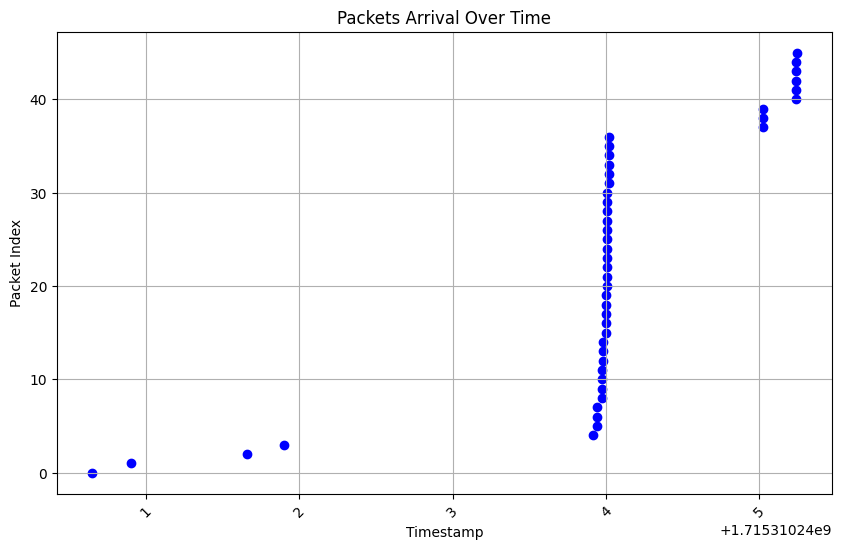

In [7]:
# Visualize packets arrival over time
plt.figure(figsize=(10, 6))
plt.scatter(wiki_df['Timestamp'], range(len(wiki_df)), label='Packets', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Packet Index')
plt.title('Packets Arrival Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\yylee\AppData\Local\Temp\ipykernel_14456\54810382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wiki_df['Time diff from first packet'] = (wiki_df['Timestamp'] -


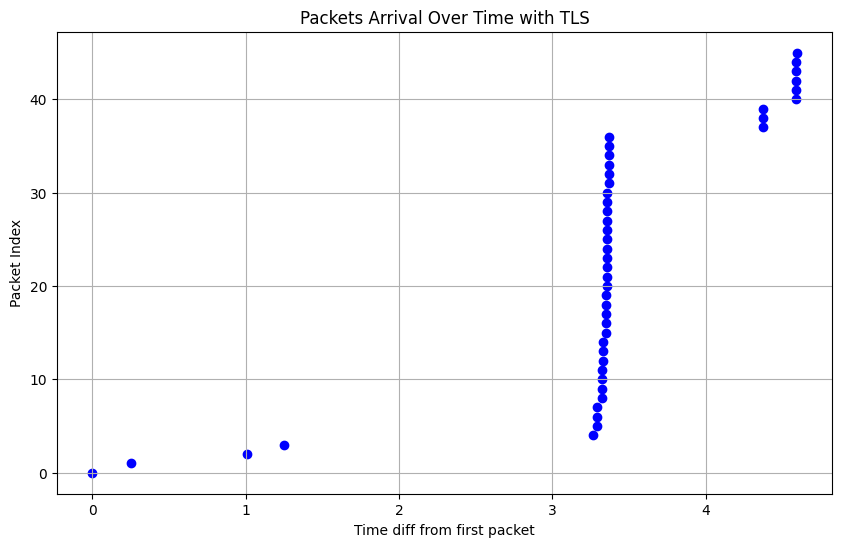

In [8]:
# Assuming wiki_df is your DataFrame containing packet information
# Convert 'Timestamp' column to datetime
# wiki_df['Timestamp'] = pd.to_datetime(wiki_df['Timestamp'], unit='ms')

# Find the timestamp of the first packet
first_packet_time = wiki_df['Timestamp'].min()

# Convert timestamps to milliseconds relative to the first packet
wiki_df['Time diff from first packet'] = (wiki_df['Timestamp'] -
                        first_packet_time)

# wiki_df['Time (ms)']

# Plot packets arrival over time
plt.figure(figsize=(10, 6))
plt.scatter(wiki_df['Time diff from first packet'], range(
    len(wiki_df)), label='Packets', color='blue')
plt.xlabel('Time diff from first packet')
plt.ylabel('Packet Index')
plt.title('Packets Arrival Over Time with TLS')
plt.grid(True)
plt.show()

C:\Users\yylee\AppData\Local\Temp\ipykernel_14456\3604081572.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time diff from first packet'] = (filtered_df['Timestamp'] -


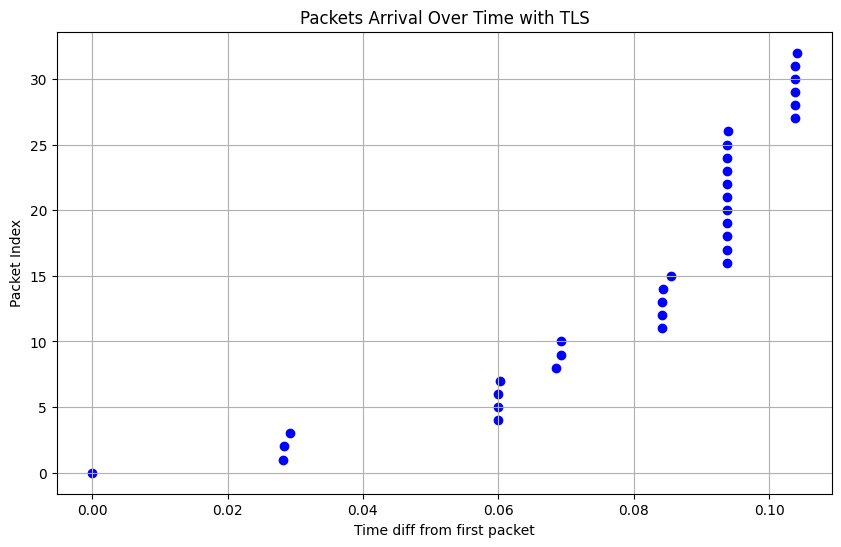

In [10]:
# Looking into the organized section in the centre

# Calculate the first and third quartiles
Q1 = wiki_df['Timestamp'].quantile(0.25)
Q3 = wiki_df['Timestamp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = wiki_df[(wiki_df['Timestamp'] >= lower_bound)
                      & (wiki_df['Timestamp'] <= upper_bound)]

# Find the timestamp of the first packet
first_packet_time = filtered_df['Timestamp'].min()

# Convert timestamps to milliseconds relative to the first packet
filtered_df['Time diff from first packet'] = (filtered_df['Timestamp'] -
                                          first_packet_time)

# wiki_df['Time (ms)']

# Plot packets arrival over time
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Time diff from first packet'], range(
    len(filtered_df)), label='Packets', color='blue')
plt.xlabel('Time diff from first packet')
plt.ylabel('Packet Index')
plt.title('Packets Arrival Over Time with TLS')
plt.grid(True)
plt.show()